In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
encoder=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(30,activation='relu')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
decoder=keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
stacked_autoencoder=keras.models.Sequential([encoder,decoder])

In [8]:
 stacked_autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [9]:
history=stacked_autoencoder.fit(x_train,x_train,epochs=20,validation_data=(x_test,x_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.1962 - val_loss: 0.1078
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1060 - val_loss: 0.0978
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0976 - val_loss: 0.0939
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0945 - val_loss: 0.0918
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0924 - val_loss: 0.0906
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0916 - val_loss: 0.0896
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0904 - val_loss: 0.0886
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0895 - val_loss: 0.0881
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0890 - val_loss: 0.0877
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0885 - val_loss: 0.0869
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0876 - val_loss: 0.0867
Epoch 12/20
1875/18

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


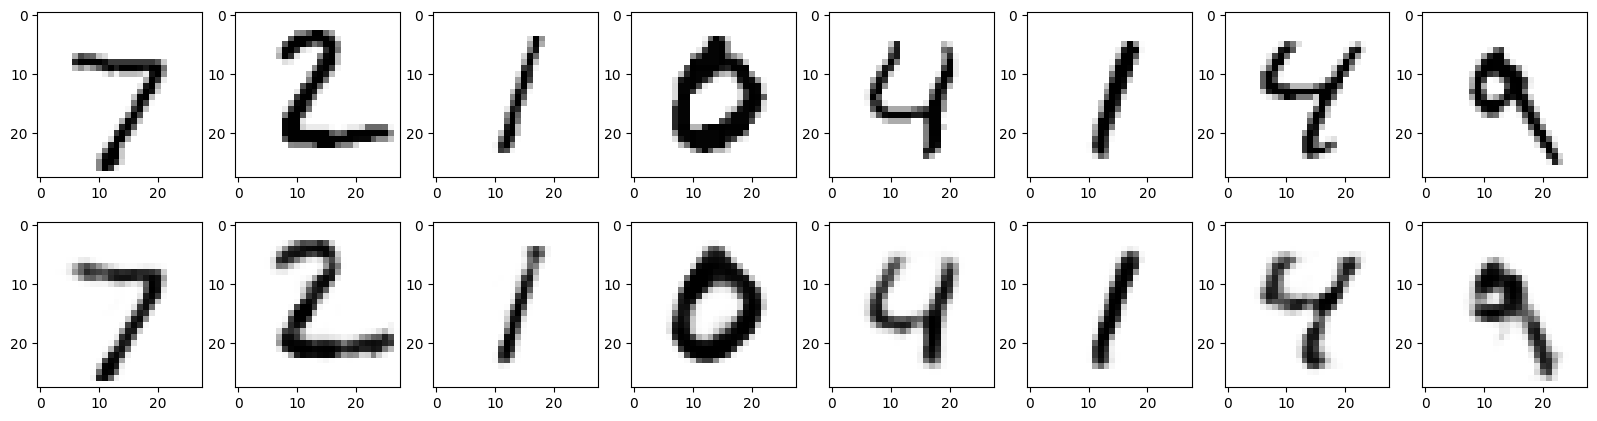

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

for i in range(8):
  plt.subplot(2,8,i+1)
  pred=stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
  plt.imshow(x_test[i],cmap="binary")
  plt.subplot(2,8,i+8+1)
  plt.imshow(pred.reshape(28,28),cmap='binary')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


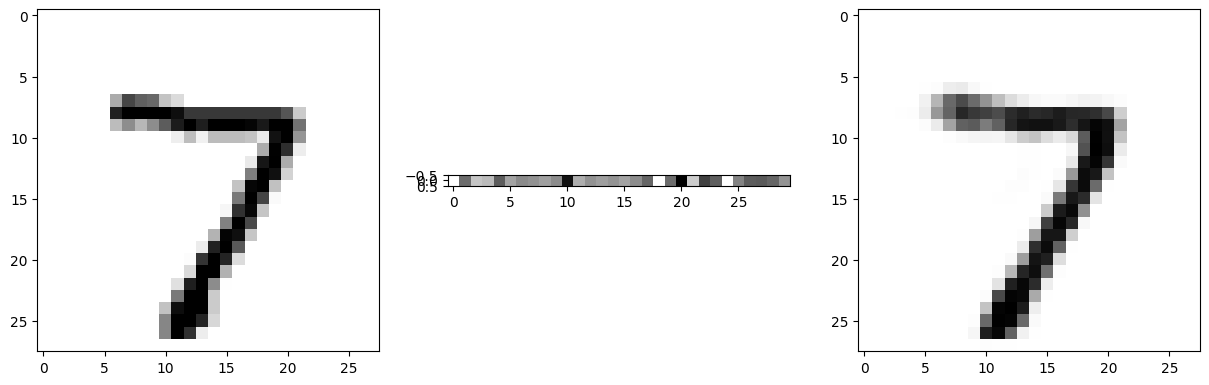

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(x_test[0],cmap='binary')

plt.subplot(1,3,2)
latent_vector=encoder.predict(x_test[0].reshape((1,28,28)))
plt.imshow(latent_vector,cmap='binary')

plt.subplot(1,3,3)
pred=decoder.predict(latent_vector)
plt.imshow(pred.reshape((28,28)),cmap='binary')


In [14]:
sparsity_low=30/(28*28)
sparsity_high=1-30/(28*28)
print(sparsity_low,sparsity_high)

0.03826530612244898 0.9617346938775511


# convolutional autoencoder

In [18]:
encoder=keras.models.Sequential([
    keras.layers.Reshape([28,28,1],input_shape=[28,28]),
    keras.layers.Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2)

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
encoder.predict(x_test[0].reshape([1,28,28])).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


(1, 3, 3, 64)

In [26]:
decoder=keras.models.Sequential([
    keras.layers.Conv2DTranspose(32,kernel_size=(3,3),strides=2,padding='valid',activation='relu',input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16,kernel_size=(3,3),strides=2,padding='same',activation='relu'),
    keras.layers.Conv2DTranspose(1,kernel_size=(3,3),strides=2,padding='same',activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [27]:
stacked_autoencoder=keras.models.Sequential([encoder,decoder])

In [28]:
stacked_autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
history=stacked_autoencoder.fit(x_train,x_train,epochs=15,validation_data=(x_test,x_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - loss: 0.1998 - val_loss: 0.0842
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - loss: 0.0832 - val_loss: 0.0779
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - loss: 0.0782 - val_loss: 0.0758
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - loss: 0.0758 - val_loss: 0.0741
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - loss: 0.0742 - val_loss: 0.0731
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - loss: 0.0730 - val_loss: 0.0722
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - loss: 0.0724 - val_loss: 0.0717
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - loss: 0.0716 - val_loss: 0.0705
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - loss: 0.0710 - val_loss: 0.0700
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - loss: 0.0705 - val_loss: 0.0694
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - loss: 0.0701 - val_loss: 0.0691
Epoch 12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


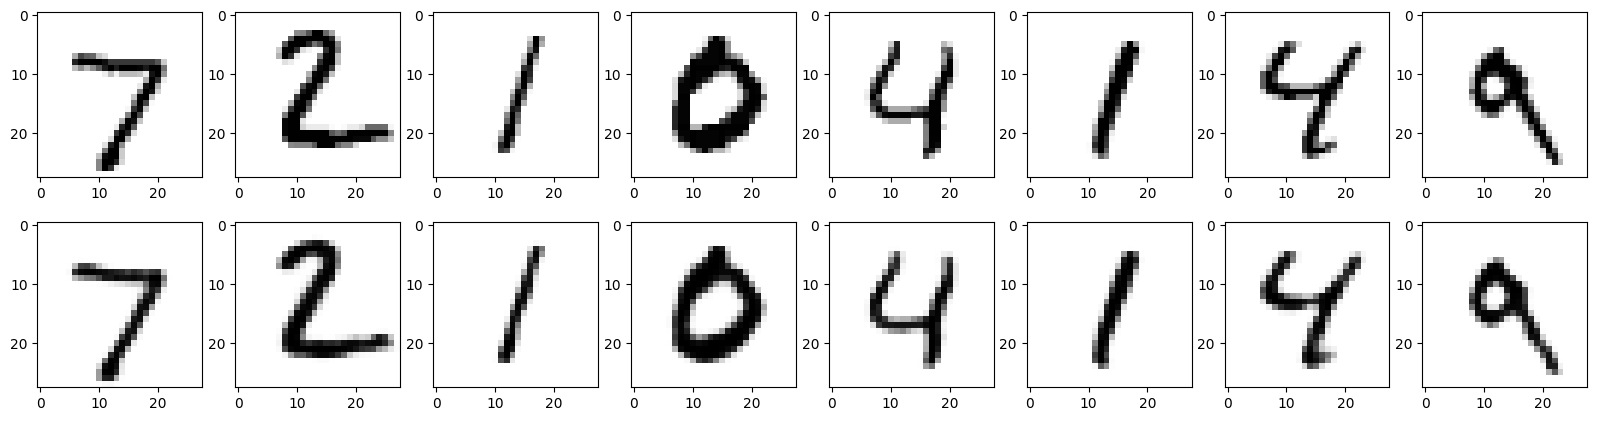

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

for i in range(8):
  plt.subplot(2,8,i+1)
  pred=stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
  plt.imshow(x_test[i],cmap="binary")
  plt.subplot(2,8,i+8+1)
  plt.imshow(pred.reshape(28,28),cmap='binary')

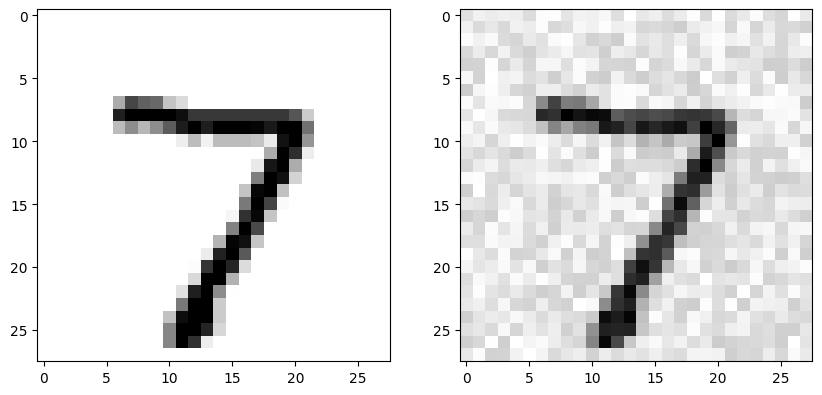

In [34]:
import numpy as np
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(x_test[0],cmap='binary')
plt.subplot(1,2,2)
noise=np.random.random((28,28))/4
plt.imshow(x_test[0]+noise,cmap='binary')

In [36]:
encoder=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(30,activation='relu')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
decoder=keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [38]:
stacked_autoencoder=keras.models.Sequential([encoder,decoder])

In [39]:
stacked_autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [41]:
x_train_noise=x_train+((np.random.random(x_train.shape))/4)
x_test_noise=x_test+((np.random.random(x_test.shape))/4)

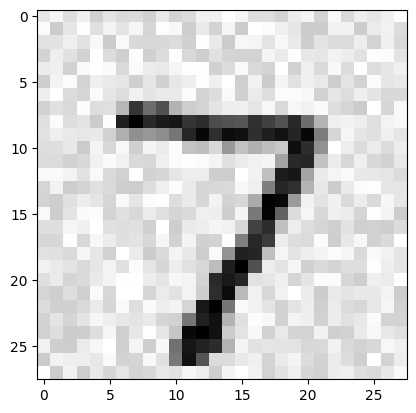

In [42]:
plt.imshow(x_test_noise[0],cmap='binary')

In [43]:
history=stacked_autoencoder.fit(x_train_noise,x_train,epochs=10,validation_data=(x_test_noise,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.0968 - val_loss: 0.0896
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0898 - val_loss: 0.0886
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0891 - val_loss: 0.0877
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0885 - val_loss: 0.0880
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0883 - val_loss: 0.0880
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0878 - val_loss: 0.0873
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0879 - val_loss: 0.0870
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0874 - val_loss: 0.0871
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0872 - val_loss: 0.0867
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0871 - val_loss: 0.0867


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


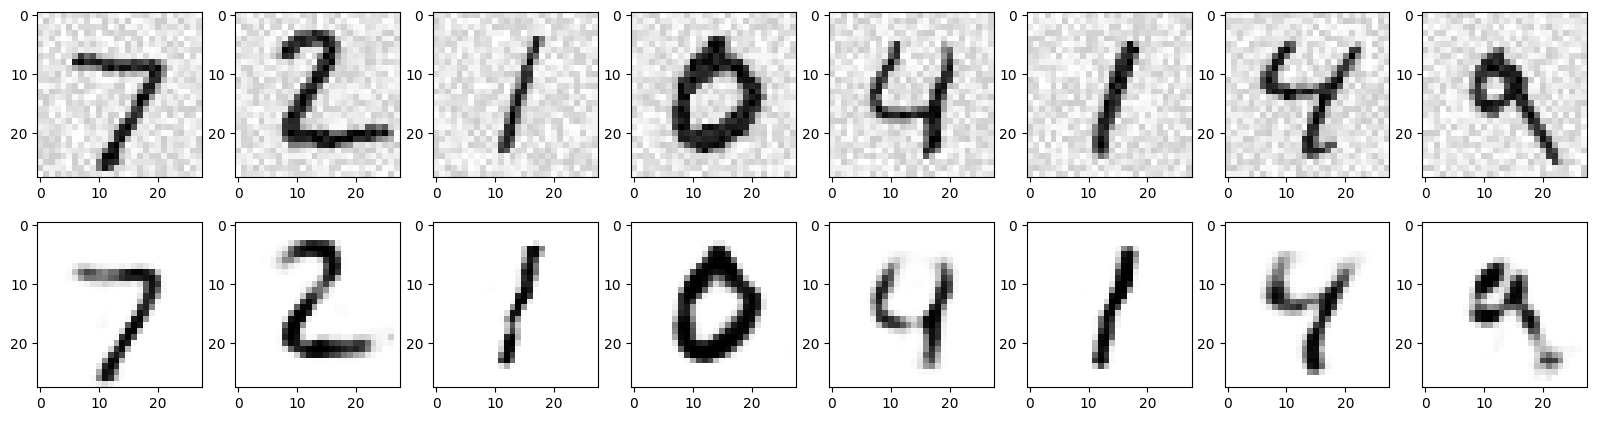

In [45]:
plt.figure(figsize=(20,5))

for i in range(8):
  plt.subplot(2,8,i+1)
  pred=stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
  plt.imshow(x_test_noise[i],cmap="binary")
  plt.subplot(2,8,i+8+1)
  plt.imshow(pred.reshape(28,28),cmap='binary')